In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
novels = pd.read_json('/Users/dclure/Projects/data/word-len-by-novel.json/part-00000-9070510c-5cc5-4c2a-a275-f9fbecc0843d-c000.json', lines=True)

Word counts in a corpus of ~10k American novels. What up with that dip around 1960? Selection artifact, or real?

Text(0.5,1.1,'Word counts, ~10k American novels, 1880-2000')

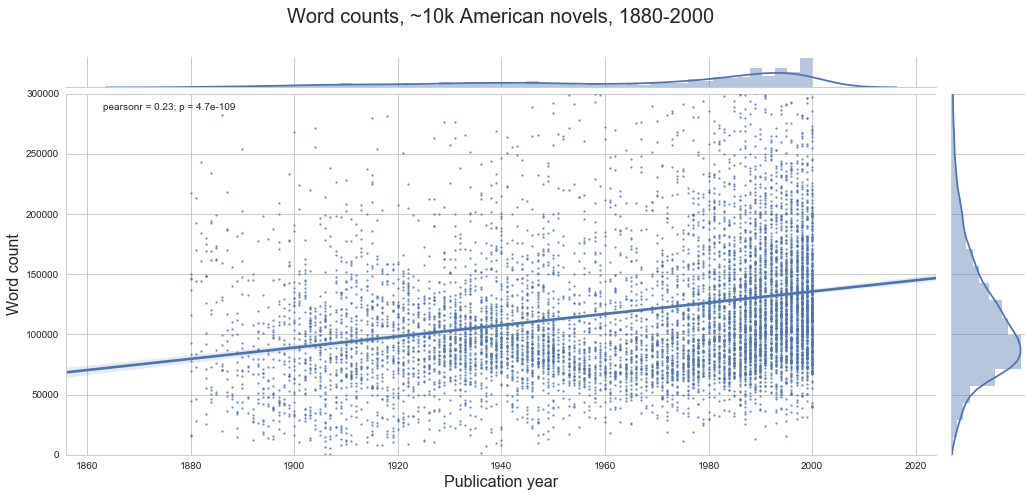

In [44]:
grid = sns.jointplot(
    'pub_year',
    'word_count',
    data=novels[novels['corpus']=='chicago'],
    kind='reg',
    size=10,
    ylim=(0, 300000),
    ratio=10,
    marginal_kws=dict(bins=50),
    scatter_kws=dict(s=5),
)

grid.fig.set_figwidth(15)
grid.fig.set_figheight(6)

plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=16)

plt.xlabel('Publication year')
plt.ylabel('Word count')
plt.suptitle('Word counts, ~10k American novels, 1880-2000', size=20, y=1.1)

Also seems to correlate roughly with the number of texts collected for each year. Though not sure why that would be.

Text(0,0.5,'Number of texts')

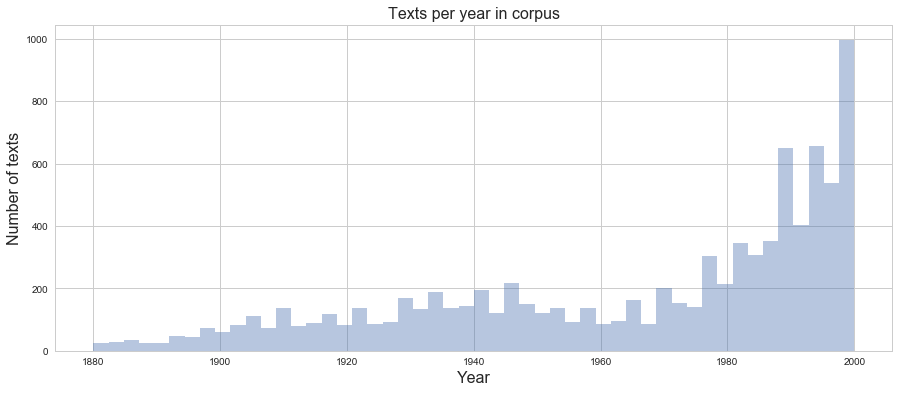

In [51]:
years = novels[novels['corpus']=='chicago']['pub_year']

plt.figure(figsize=(15,6))

sns.distplot(years, bins=50, kde=False)

plt.title('Texts per year in corpus')
plt.xlabel('Year')
plt.ylabel('Number of texts')

In [48]:
novels.describe()

,avg_word_len,chicago_clean,pub_year,word_count
count,27165.000000,9089.000000,27166.000000,2.716600e+04
mean,3.680897,0.761360,1913.461054,9.272392e+04
std,0.164618,0.426276,45.858824,5.744481e+04
min,2.095526,0.000000,1785.000000,0.000000e+00
25%,3.577441,1.000000,1887.000000,5.721900e+04
50%,3.678560,1.000000,1905.000000,8.432300e+04
75%,3.782706,1.000000,1940.000000,1.171218e+05
max,4.944597,1.000000,2000.000000,1.347608e+06
